In [1]:

library(data.table) 
library(ggplot2)
library(dplyr)
library(e1071)
library(rpart)
library(caret)
library(tidyverse)
library(ggplot2)
library(stringr)
library(ISLR)


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'e1071' was built under R version 3.4.3"Loading required package: lattice
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Conflicts with tidy packages ---------------------------------------------------
between():   dplyr, data.table
filter():    dplyr, stats
first():     dplyr, data.table
lag():       dplyr, stats
last():      dplyr, data.table
lift():      purrr, caret
transpose(): purrr, data.table
Warning message:
"package 'ISLR' was built under R version 3.4.3"

In [2]:
colorstats <- read.csv('Stats.csv')
colorstats %>%
  select(Percentage.Black, Percentage.White, Percentage.Blue, Percentage.Red, Percentage.Yellow,
         Percentage.Green, Percentage.Purple, People, Percentage.Cyan, Number.of.Likes) ->stat
stat %>%
 select(Percentage.Black, Percentage.White, Percentage.Blue, Percentage.Red, Percentage.Yellow,
         Percentage.Green, Percentage.Purple, Percentage.Cyan) ->sorted
cbind(sorted, t(apply(sorted, 1, sort, decreasing = TRUE))) -> sorted1
colnames(sorted1) <- c("Percentage.Black", "Percentage.White", "Percentage.Blue", "Percentage.Red", "Percentage.Yellow",
                     "Percentage.Green","Percentage.Purple","Percentage.Cyan", "Color1", "Color2", "Color3",
                     "Color4", "Color5", "Color6", "Color7", "Color8")
sorted1 %>%
 select(Color1, Color2, Color3, Color4, Color5, Color6, Color7, Color8) ->domcolor
dompcolor <- domcolor
dompcolor$People <- stat$People

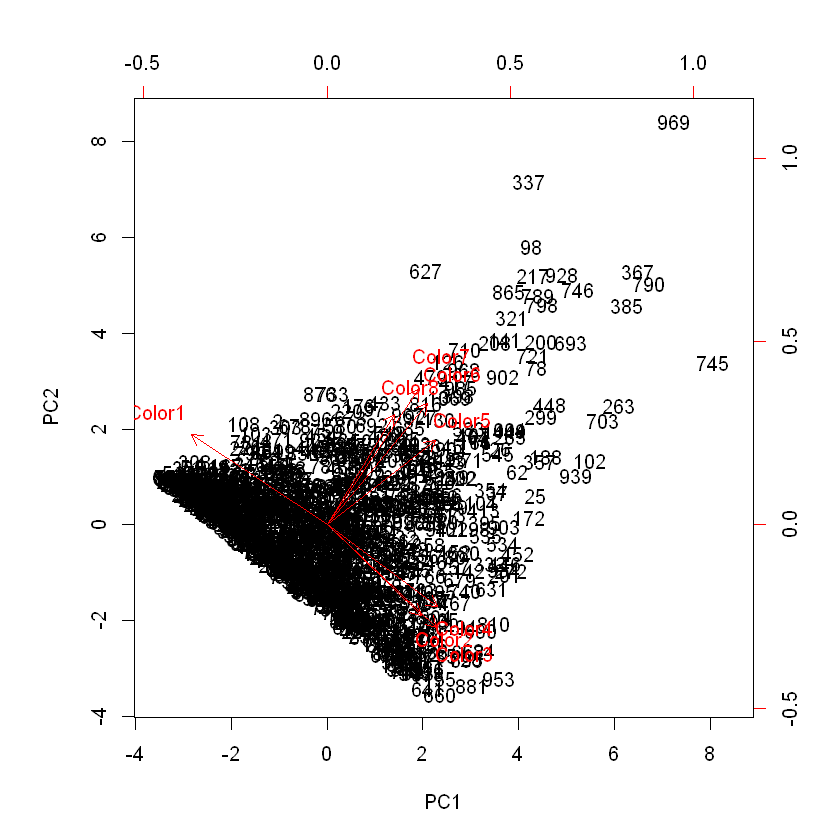

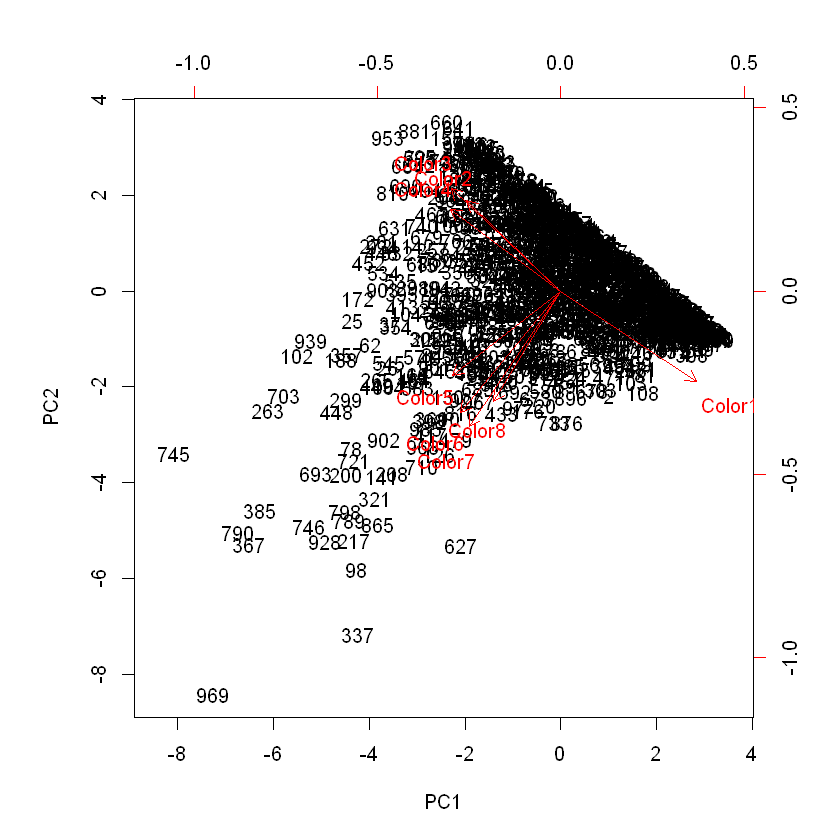

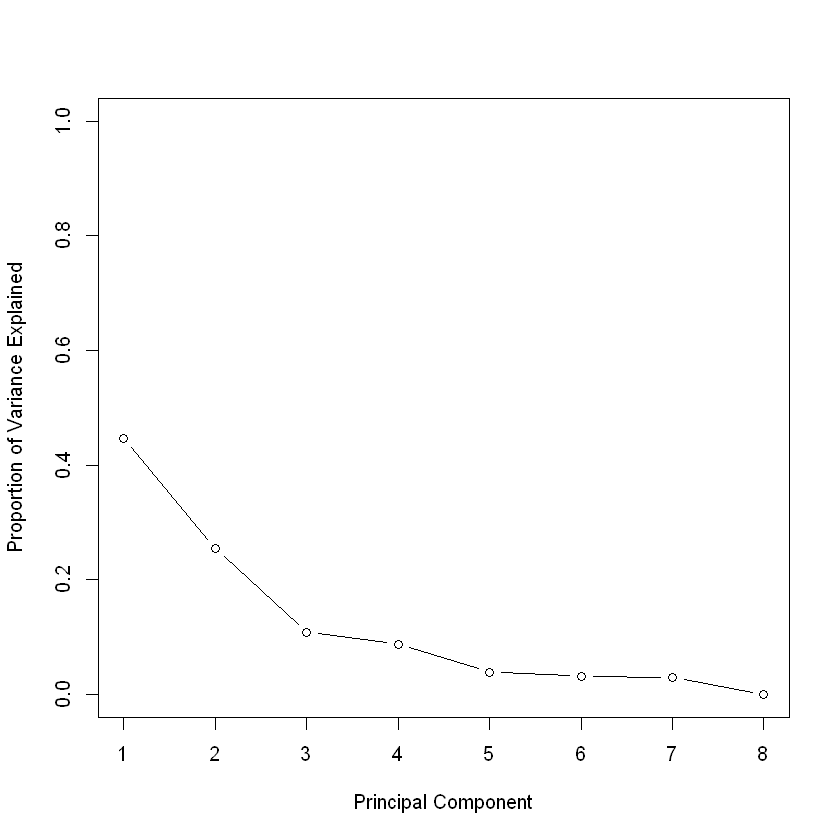

Color1       Color2       Color3       Color4       Color5       Color6 
0.6459484816 0.1981914408 0.0855882647 0.0460282577 0.0145533771 0.0066016308 
      Color7       Color8 
0.0024452169 0.0006432537

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Color1,0.4635939,-0.3085833,0.1726081,-0.12369230,0.005863574,0.02186432,0.004523955,0.802639917
Color2,-0.3197173,0.3092017,-0.5730858,0.45941446,0.049186480,0.11717726,-0.046998402,0.494295048
Color3,-0.3736132,0.3502720,0.1915110,-0.34525373,-0.277965251,-0.64025485,0.138426246,0.274760425
Color4,-0.3751617,0.2790921,0.3688949,-0.36220612,0.157913173,0.67846446,-0.013368260,0.169278689
Color5,-0.3693646,-0.2877438,0.3945037,0.31591987,0.401858758,-0.25429663,-0.541995781,0.073607372
Color6,-0.3412223,-0.4138232,0.1871742,0.29910539,0.020559142,0.04018547,0.764406266,0.038275692
Color7,-0.3127069,-0.4610648,-0.1267428,-0.08975179,-0.726428076,0.19600147,-0.314733450,0.018520417
Color8,-0.2277717,-0.3767770,-0.5121407,-0.57089436,0.453579286,-0.10417737,0.036008854,0.008180736


Color1      Color2      Color3      Color4      Color5      Color6 
0.179332850 0.110439782 0.061389399 0.037821725 0.016445988 0.008551916 
     Color7      Color8 
0.004138026 0.001827750

[1] 1.891789e+00 1.427298e+00 9.323399e-01 8.404694e-01 5.568422e-01
[6] 5.081633e-01 4.899026e-01 3.360313e-06

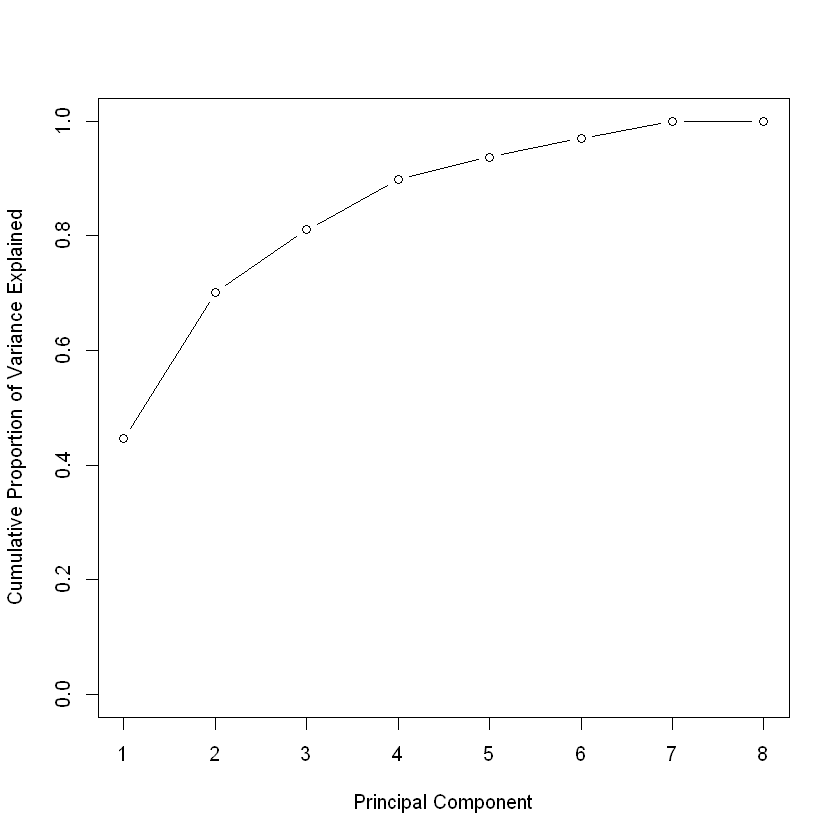

In [3]:
dcpr.out=prcomp(domcolor,scale=TRUE)
biplot(dcpr.out,scale=0)
dcpr.out$rotation=-dcpr.out$rotation
dcpr.out$x=-dcpr.out$x
biplot(dcpr.out,scale=0)
dcpr.var=dcpr.out$sdev^2
dcpve=dcpr.var/sum(dcpr.var)
plot(dcpve,xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1), type='b')
plot(cumsum(dcpve),xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", 
    ylim=c(0,1), type='b')
dcpr.out$center
dcpr.out$rotation
dcpr.out$scale
dcpr.out$sdev

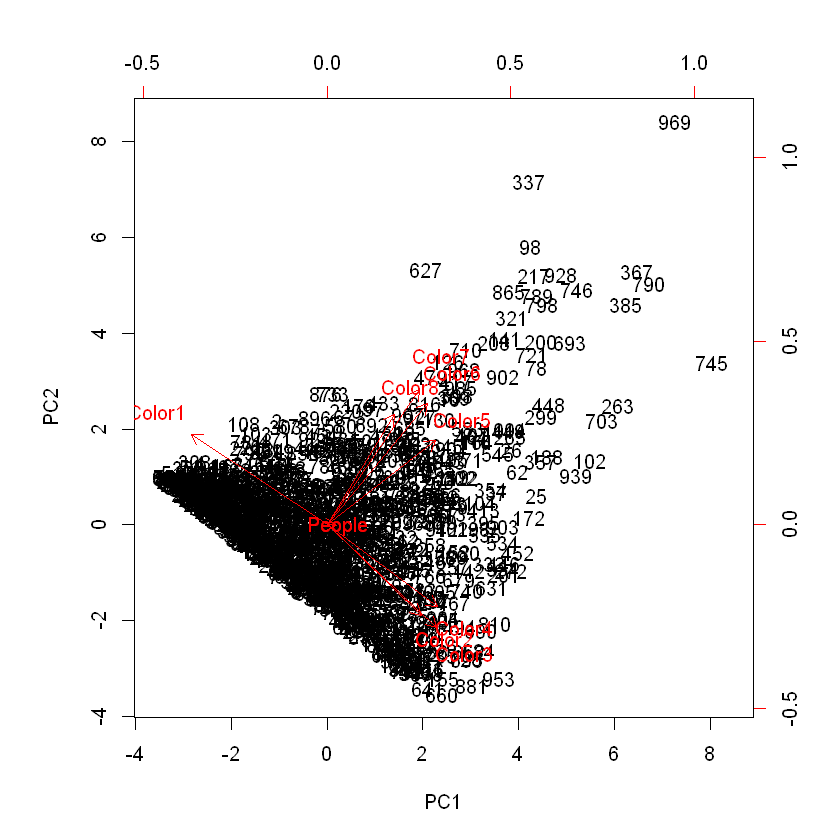

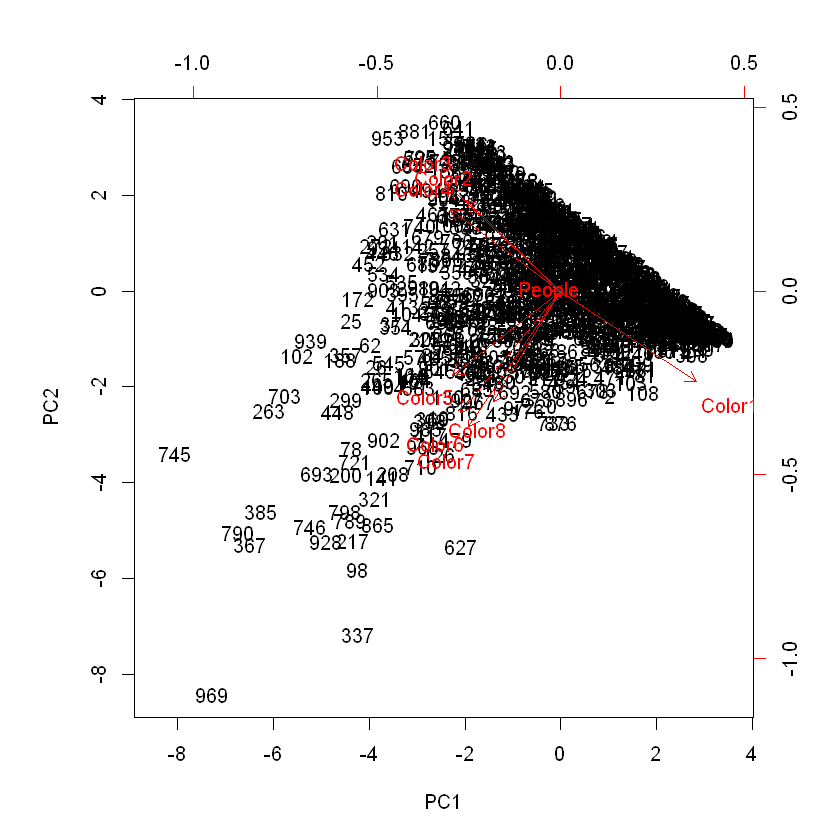

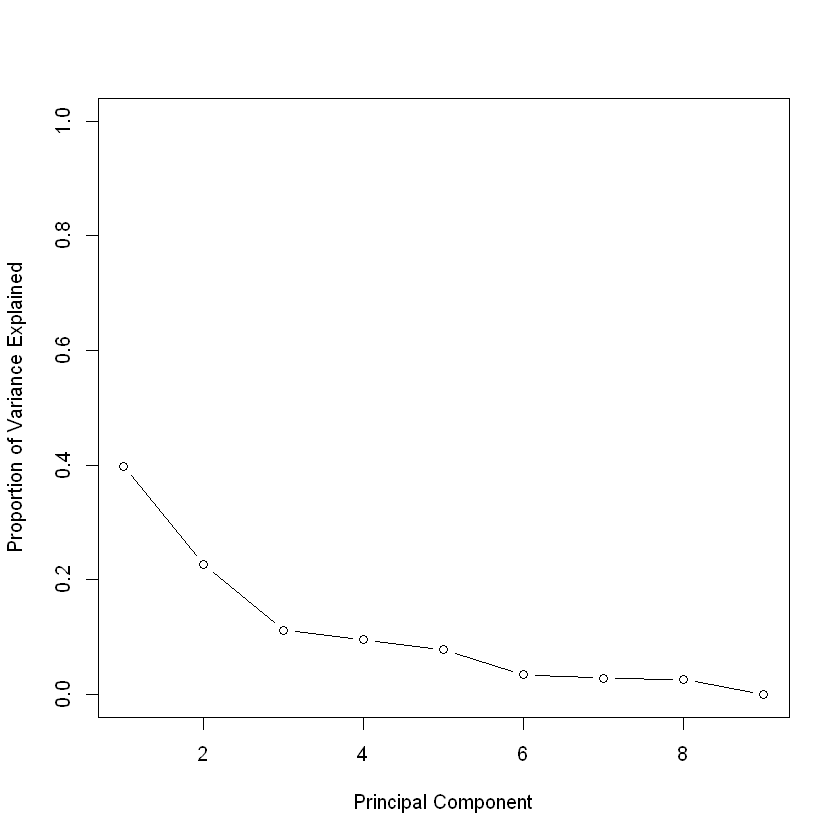

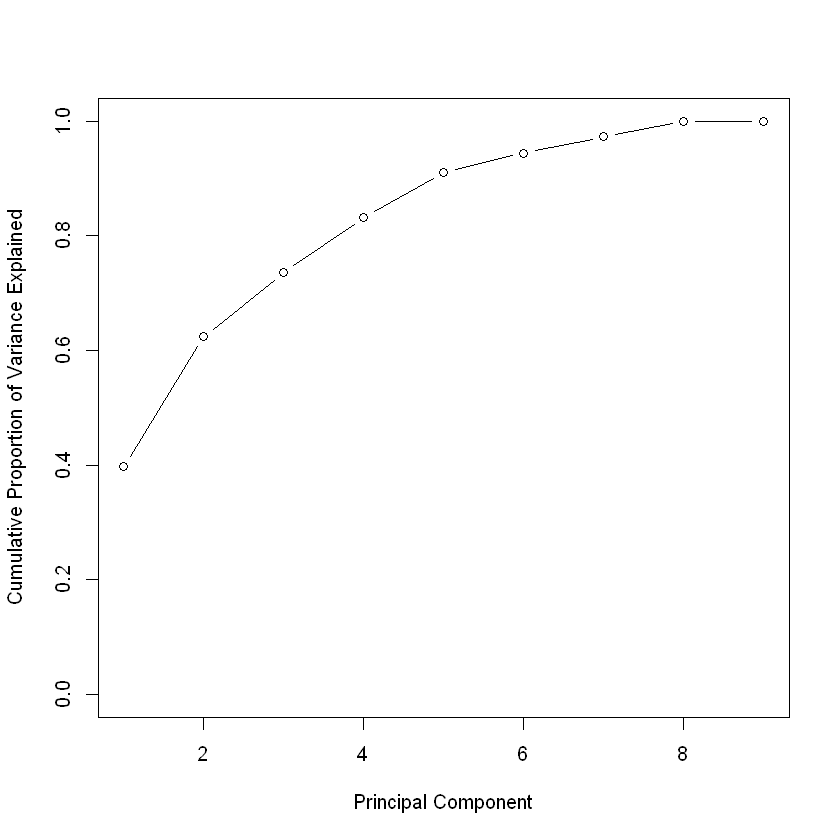

In [4]:
dpcpr.out=prcomp(dompcolor,scale=TRUE)
biplot(dpcpr.out,scale=0)
dpcpr.out$rotation=-dpcpr.out$rotation
dpcpr.out$x=-dpcpr.out$x
biplot(dpcpr.out,scale=0)
dpcpr.var=dpcpr.out$sdev^2
dpcpve=dpcpr.var/sum(dpcpr.var)
plot(dpcpve,xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1), type='b')
plot(cumsum(dpcpve),xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", 
    ylim=c(0,1), type='b')